<h1>Math</h1>

In this section, we're going to move on to the next notebook of the series, which is all about Temporal Difference learning

---

<h3>Temporal Difference (TD) Learning</h3>

So it's always good to recap what we've done so far in order to have a better understanding of where we are going next

We'll see that with each notebook of this series, we're going to peel back more and more layers, which allows us to handle more complex problems with more sophisticated techniques

So in the last few notebooks, we've established the framework to be used for solving reinforcement learning problems

This is the MDP

<img src='extras/57.1.PNG'></img>

We learned about how the agent uses rewards that it gets from the environment in order to learn how to act such that its future rewards will be maximized

In the dynamic programming notebook, we learned about how to solve both prediction and control when the environment dynamics are known

When this is the case, there is no need to actually play any episodes since a model of the environment allows us to find the optimal policy directly using Bellman's equations 

In the Monte Carlo notebook, we removed this restriction without any model of the environment, playing episodes and gaining experience is necessary

We saw that the main principle behind the Monte Carlo method is pretty simple

Just replace the expected value of the return with the sample mean of actual returns

Now there were obviously some details we had to contend with, but the main idea itself was not very complex

---

<h3>New Ideas</h3>

In this notebook, we'll progress to a few new ideas

One question whose answer is not clear is, what if we have an environment such that episodes never end?

We'll recall that from Monte Carlo to work, we require episodes to terminate so that the return can be computed

We'll see how TD learning can tackle this problem

<img src='extras/57.2.PNG' width='600'></img>

Another way to view what we'll be doing in this notebook is this 

Recall that dynamic programming uses a technique called <strong>bootstrapping</strong> 

At each step of our algorithm, the value estimate is improved by iterating on the previous estimate

Specifically, the new value at each state is estimated by using the current value at all the possible next states

That is, the new $V(s)$ is improved by using all the current $V(s^\prime)$

On the other hand, Monte Carlo does not make use of this technique

Instead, it learns purely from samples, taking the sample mean of all the returns it's seen so far 

In this notebook, we'll see that temporal difference learning borrows ideas from both of these techniques

Temporal Difference Learning is a sample based method, so it uses samples from the environment to improve its estimate

But at the same time, it's also a bootstrapping method

We'll see how we make use of our estimates of $V(s^\prime)$ in order to update $V(s)$

---

<h3>TD Outline</h3>

So as before, this notebook will proceed using the same basic outline

First, we'll discuss how the TD principle can be applied to the prediction task

Once we understand the basics of how it works, we can then apply it to the control task

As with Monte Carlo, there are two variants of TR learning that we'll discuss in this series

Now there are actually more that exist, but the two in this series are what we would consider to be the most fundamental

The first one we're looking at is called SARSA, and the second one we'll look at is the famous Q-learning technique

<h1>Math</h1>

In this section, we're going to look at how to apply TD learning to prediction


As we recall, the problem is given a policy $\pi$ we would like to find the $V_\pi(s)$

So the best place to begin is where we left off with using Monte Carlo methods

---

<h3>Monte Carlo Recap</h3>

Using the Monte Carlo method, we know that what we would like to estimate is the expected return from a given state $s$

We do this by collecting lots of sample returns and then averaging those returns to get our estimate

$$\large V_N(s) = \frac{1}{N} \sum^N_{i=1} G_{i,s}$$

Now, in the previous notebook, we remember that in the implementation we didn't use this exact formula to calculate the sample mean

That is, we didn't just sum up all the samples and divide by the number of samples

We'll recall that this is an inefficient computation because as we collect more and more samples, this takes longer and longer

Instead, we learn that we could replace this computation with the one step computation based on the previous estimate

$$\large V_N(s) = \color{red}{\boxed{\color{black}{\frac{1}{N} \sum^N_{i=1} G_{i,s}}}} = \color{green}{\boxed{\color{black}{V_{N-1}(s) + \frac{1}{N} (G_{N,s} - V_{N-1}(s))}}}$$

$\color{red}{\text{Inefficient}},\ \color{green}{\text{Efficient}}$

---

<h3>Constant Alpha / EWMA Monte Carlo</h3>

One simple modification we can make to the Monte Carlo update is this 

Recall that if our targets are non stationary, then using a constant learning rate, $\alpha$ results in an exponentially weighted moving
average

In fact, it would be quite easy to modify our previous Monte Carlo scripts to use a constant $\alpha$ instead

$$\large V(s) \leftarrow V(s) + \alpha (G-V(s))$$

So in this assignment, we've removed the $N$ subscripts for simplicity and we've replaced $\frac{1}{N}$ with $\alpha$, which denotes a constant

$G$ represents the latest sample

On the right hand side, $V(s)$ represents the existing estimate for $V(s)$ and on the left hand side, $V(s)$ represents our new estimate for $V(s)$

---

<h3>Bellman Equation Recap</h3>

Let's consider another piece of the puzzle, the Bellman equation

It states there the value function can be expressed in terms of an expected value of the next state value functions instead of the return

$$\large V_\pi(s) = E_\pi \left[ \color{green}{\boxed{\color{black}{R_{t+1} + \gamma V_\pi (S_{t+1})}}} \vert S_t = s \right]$$

note : $\color{green}{\text{still an expected value}}$

The Monte Carlo method did not make use of this equation, but temporal difference learning will

---

<h3>Temporal Difference Learning</h3>

So what is temporal difference learning?

Temporal difference learning is simply to combine these two things together 

Instead of trying to compute the average of all the sample $G$s, let's compute the average of $R + \gamma V(s^\prime)$

$\large {{\text{MC} \\ V(s) \leftarrow V(s) + \alpha(G-V(s)) \qquad \qquad \qquad \qquad } {\text{DP} \\ V_\pi(s) = E_\pi \left[ R_{t+1} + \gamma V_\pi(S_{t+1}) \vert S_t = s \right] }} \\ {\text{ }} \\ \qquad  \qquad \qquad \qquad \large V(s) \leftarrow  V(s) + \alpha(r + \gamma V(s^\prime) - V(s))$

The important thing to notice about this is that, unlike Monte Carlo, this does not require us to know $G$

This means we do not have to wait until the episode is over to make an update

This can be helpful in cases where episodes are very long or even infinite

In effect, the agent can learn as it goes as long as it has one reward, it can perform this update 

Also recognize the use of bootstrapping 

Effectively, the target value, which is $r + \gamma V(s^\prime)$ depends on the value function estimate at the next state $s^\prime$

In other words, our estimate of $V(s)$ depends on another estimate

The target is really composed of two parts, the part that we know for sure and the part we have to guess

The reward $r$ is the part we know for sure

The future rewards, we don't know yet so we have to guess

And of course, our guess for that is $V(s^\prime)$

Now, luckily, despite the fact that we no longer use the full return, this has been proven to still converge to the correct answer

---

<h3>Preudocode</h3>

So here's the full pseudocode for temporal difference prediction

```
Given: π
Initialise: V(s) = 0 for all s in state space

Loop until convergance:
    s = env.reset()
    while s not terminal:
        a = π(s) or a ~ π(a|s)
        s',r = env.move(a)
        V(s) = V(s) + α(r + γV(s')-V(s))
        s = s'
```

One of the major changes going from Mont Carlo to temporal difference learning is that there is no need to play an entire episode to collect a list of states and rewards

Instead, we can recognize that temporal difference learning only requires a single step before making an update

Specifically, the value for state $s$ depends only on the results of the reward $r$ and the next state $s^\prime$

So to begin, we accept as input some policy $\pi$ whose value function we want to find

Next, we initialize $V(s)$ arbitrarily, except for the terminal states where we already know that $V(s) = 0$

Next, we enter a loop that goes for some number of episodes

Inside this loop, we reset our environment and begin a new episode at some state $s$

Next, we enter another loop that goes on until the episode is complete 

Inside the second loop, we look at our policy to determine the next actions that perform given the state $s$ 

We perform this action which brings us to the next state $s^\prime$ and yields the reward $r$ 

Next we update $V(s)$ using the temporal difference update we saw earlier

Next, we update the $s$ variable to be $s^\prime$ since that is now the current state

OK, so pretty simple algorithm

Again, note how there is no distinct function for playing an episode

Both episode playing and value function updates are part of the same loop

<h1>code</h1>

In [21]:
# lets try implementing policy evaluation using RD learning
# of course since we will be resetting our env
# we need epsilon greedy
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# first lets implement our Gridworld enviroment
# we will be using the same interface as described above

class GridWorld:
    def __init__(self,rows,cols,start_pos):
        self.rows = rows
        self.cols = cols
        self.pos = start_pos
        self.start_pos = start_pos
    
    def current_state(self):
        return self.pos
    
    def set_state(self,state):
        self.pos = state
        
    def set_actions_rewards(self,actions,rewards):
        self.actions = actions
        self.rewards = rewards
        
    def all_states(self,):
        return [(i,j) for i in range(self.rows) for j in range(self.cols)]
    
    def is_terminal(self,state):
        # we cant perform an action in a terminal state
        # so we expect not to find it in the keys
        return state not in self.actions.keys()
    
    def game_over(self):
        return self.is_terminal(self.pos)
    
    def next_state(self,s,a):
        # return next state should we take action a
        # but do not take that action
        i,j = s
        # if we are allowed to do this action in our current position
        if a in self.actions.get(s,[]): 
            if a == 'R':
                j += 1
            if a == 'L':
                j -= 1
            if a == 'U':
                i -= 1
            if a == 'D':
                i += 1
        return (i,j)
    
    def move(self,a):
        # return next state should we take action a
        # this time we actually make the move
        # and thus return reward
        i,j = self.pos
        # if we are allowed to do this action in our current position
        if a in self.actions.get(self.pos,[]): 
            if a == 'R':
                j += 1
            if a == 'L':
                j -= 1
            if a == 'U':
                i -= 1
            if a == 'D':
                i += 1
        self.pos = (i,j)
        # if no reward return 0
        return self.rewards.get(self.pos,0)
    
    # lets add methods to print values and actions
    def print_values(self,V):
        for i in range(self.rows):
            print('-'*9*self.rows)
            for j in range(self.cols):
                v = V[i,j]
                if v >= 0:
                    # if 0 or +ve, add space so it aligns well when we have -
                    print(" %.2f|" %v,end="")
                else:
                    print("%.2f|" %v,end="")
            print("")
    
    def print_policy(self,P):
        for i in range(self.rows):
            print('-'*6*self.rows)
            for j in range(self.cols):
                print(" %s |" %P.get((i,j),' '),end="")
            print("")
                
    def state_to_loc(self,state): # convert state tupe (0,1) to location 1
        return state[0]*self.rows + state[1]
    
    def reset(self):
        self.pos = self.start_pos

In [23]:
def standrad_grid():
    g = GridWorld(3,4,(2,0))
    rewards = {(0,3):1,(1,3):-1}
    actions = {
        (0,0): ('D','R'),
        (0,1): ('L','R'),
        (0,2): ('L','D','R'),
        (1,0): ('U','D'),
        (1,2): ('U','D','R'),
        (2,0): ('U','R'),
        (2,1): ('L','R'),
        (2,2): ('L','R','U'),
        (2,3): ('L','U')
    }
    g.set_actions_rewards(actions,rewards)
    return g

In [24]:
g = standrad_grid()

In [25]:
# fixed policy (deterministic)
pi = {
    (2,0) : 'U',
    (1,0) : 'U',
    (0,0) : 'R',
    (0,1) : 'R',
    (0,2) : 'R',
    (1,2) : 'R',
    (2,1) : 'R',
    (2,2) : 'R',
    (2,3) : 'U'    
}

In [26]:
g.print_policy(policy)

------------------
 R | R | R |   |
------------------
 U |   | U |   |
------------------
 U | L | L | L |


In [27]:
def epsilon_greedy(best_action,eps=0.1):
    if np.random.random() < eps:
        return np.random.choice(['U','R','D','L'])
    else:
        return best_action

In [28]:
def TD_eval():
    deltas = []
    all_states = g.all_states()
    V = np.zeros((g.rows,g.cols))
    V_old = V.copy()
    
    all_actions = ['L','U','D','R']
    
    episodes = 10000
    alpha = 0.1
    gamma = 0.9
    
    for episode in range(episodes):
        g.reset()
        s = g.current_state()
        while not g.game_over():
            a = epsilon_greedy(pi[s])
            r = g.move(a)
            s_prime = g.current_state()
            V[s] = V[s] + alpha*(r+gamma*V[s_prime]-V[s])
            s = s_prime
        delta = np.max(np.abs(V-V_old))
        deltas.append(delta)
        V_old = V.copy()
    plt.plot(deltas)
    plt.show()
    return V

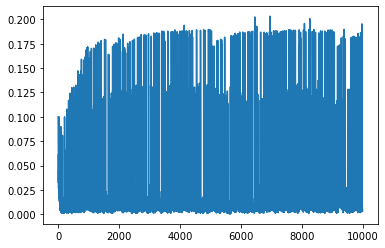

In [29]:
V = TD_eval()

In [30]:
# So one interesting thing we'll notice is that the deltas do not decrease over time, as they did before
# One reason this is the case is that our learning rate is now constant rather than decreasing with each sample as before

In [31]:
g.print_values(V)

---------------------------
 0.75| 0.84| 0.97| 0.00|
---------------------------
 0.68| 0.00|-0.97| 0.00|
---------------------------
 0.61|-0.77|-0.88|-0.99|


In [55]:
# Another thing to keep in mind is the accuracy of our value function estimate because we're using epsilon greedy
# There are some states here which will be visited only very rarely
# This means that we have less opportunity to collect samples and hence those values will be less accurate
# We'll recall that we encountered the same issue with Monte Carlo
# however, because the value function for other states depends on the value function for those states this inaccuracy can propagate
# One thing we might want to try in order to test how accurate this is, is to run dynamic programming, which essentially finds the exact solution
# We can also do what we did before, where we counted how many times we were able to visit each state on the grid

<h1>Math</h1>

So in the previous sections, we learned how to apply temporal difference learning 

As we come to expect, the next step is now to apply this principle to control

So how can this be done?

---

<h3>SARSA - Temporal Difference Control</h3>

The first method we're going to discuss is Sarsa

How it works is essentially embedded in its name :o

Clearly, the letters `SARSA = (s,a,r,s',a')` correspond to the states actions and rewards that we encounter while we play an episode

<img src='extras/57.3.PNG' width='500'></img>

Suppose that we are in state $s$

Then we use our current policy to obtain the action we should perform, which we call $a$, then we perform that action

This brings us to the next state $s^\prime$

We also obtain a corresponding reward $r$ at the same time

Given the next state $s^\prime,e$, we can use our policy again to determine the next action, $a^\prime,e$

So this gives us our SARSA tuple from which we can derive our value update

---

<h3>SARSA Update</h3>

So as we recall from the Monte Carlo notebook, when we're doing prediction, it's ok to use $V$, but when it comes to control, we need to use $Q$

This is because the optimal action will need to be derived from $Q$ and not $V$

If we use $V$, then we would need to compute an expected value in order to know the optimal action which can't be found since we don't know the environment dynamics

Otherwise, notice that this is essentially the $Q$ version of temporal difference prediction for the value function

$$\large Q(s,a) \leftarrow Q(s,a) + \alpha (r + \gamma Q(s^\prime,a^\prime) - Q(s,a))$$

---

<h3>Control vs Prediction</h3>

So what makes this different from prediction, how is this a control algorithm?

Well, when it comes time to determine which actions to perform instead of following some given policy, we're always going to take the $\arg \max$ over $Q(s,a)$

$$\large a^* = \arg \max_a Q(s,a)$$

That is to say, we'll use our most recent estimate of $Q$ to determine the best action to take 

As $Q$ approaches $Q^*$, both the value function and corresponding policy will approach their optimal values 

note : we call this "generalised policy iteration": Update Q (evaluation), then update policy (improvement), etc.

One thing to remember, however, is that we don't always perform the action $a^*$

This is because, as we've learned several times in this notebook, we need exploration

Exploration is required because that's what allows us to have an accurate estimate for $Q$ 

By using Epsilon greedy, we can ensure that once in a while we choose a random action which helps us make $Q$ more accurate for all states and all actions

But most of the time we perform the greedy action to obtain the best return


---

<h3>SARSA Pseudocode</h3>

So let's now look at the pseudocode for SARSA

```
Loop until convergance:
    s = env.reset()
    a = epsilon_greedy(Q(s,:))
    while s not terminal:
        s',r = env.move(a)
        a' = epsilon_greedy(Q(s',:))
        Q(s,a) = Q(s,a) + α(r + γQ(s',a')-Q(s,a))
        s = s', a = a'
```

As we can see, it's quite short and it also contains one of the major features we saw with temporal difference prediction

This was that playing the episode and updating the value now appear in the same loop

This is unlike Monte Carlo, where we had a separate function to play the episode and updated the value only after the episode was complete

So in SARSA, recognize that there's no need to initialize any random policy

Instead, we just need to randomly initialize $Q$ because our policy is always derived from $Q$

Note that the terminal states should still have their queue values equal to $0$

Next, we enter a loop which will go for however many episodes we want to play 

Inside the loop, we reset our environment and obtain our initial estimate

Next, we choose an action based on the current value stored in $Q$ and the current state $s$

Next, we enter a loop that exits when the episode is complete

Inside the loop, we perform the action $a$ and this yields a reward $r$ and the next state $s^\prime$

Once we have the next state $s^\prime$, we can use this to find out what our next action should be which we'll call $a^\prime$

Notice that we now have our full SARSA tuple `(s,a,r,s',a')`

Using this, we can now do our update for $Q$ Using the formula we learned before

Finally we assign $s^\prime$ to be $s$, and $a^\prime$ to be $a$ for the next iteration of this loop

OK, so thats SARSA 

Notice how using this algorithm, it doesn't matter how long our episode is, the agents is always learning

Even if our episode is infinitely long, we could quit when you see that the value has converged

<h1>code</h1>

In [1]:
# lets try implementing policy evaluation using RD learning
# of course since we will be resetting our env
# we need epsilon greedy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# first lets implement our Gridworld enviroment
# we will be using the same interface as described above

class GridWorld:
    def __init__(self,rows,cols,start_pos):
        self.rows = rows
        self.cols = cols
        self.pos = start_pos
        self.start_pos = start_pos
    
    def current_state(self):
        return self.pos
    
    def set_state(self,state):
        self.pos = state
        
    def set_actions_rewards(self,actions,rewards):
        self.actions = actions
        self.rewards = rewards
        
    def all_states(self,):
        return [(i,j) for i in range(self.rows) for j in range(self.cols)]
    
    def is_terminal(self,state):
        # we cant perform an action in a terminal state
        # so we expect not to find it in the keys
        return state not in self.actions.keys()
    
    def game_over(self):
        return self.is_terminal(self.pos)
    
    def next_state(self,s,a):
        # return next state should we take action a
        # but do not take that action
        i,j = s
        # if we are allowed to do this action in our current position
        if a in self.actions.get(s,[]): 
            if a == 'R':
                j += 1
            if a == 'L':
                j -= 1
            if a == 'U':
                i -= 1
            if a == 'D':
                i += 1
        return (i,j)
    
    def move(self,a):
        # return next state should we take action a
        # this time we actually make the move
        # and thus return reward
        i,j = self.pos
        # if we are allowed to do this action in our current position
        if a in self.actions.get(self.pos,[]): 
            if a == 'R':
                j += 1
            if a == 'L':
                j -= 1
            if a == 'U':
                i -= 1
            if a == 'D':
                i += 1
        self.pos = (i,j)
        # if no reward return 0
        return self.rewards.get(self.pos,0)
    
    # lets add methods to print values and actions
    def print_values(self,V):
        for i in range(self.rows):
            print('-'*9*self.rows)
            for j in range(self.cols):
                v = V[i,j]
                if v >= 0:
                    # if 0 or +ve, add space so it aligns well when we have -
                    print(" %.2f|" %v,end="")
                else:
                    print("%.2f|" %v,end="")
            print("")
    
    def print_policy(self,P):
        for i in range(self.rows):
            print('-'*6*self.rows)
            for j in range(self.cols):
                print(" %s |" %P.get((i,j),' '),end="")
            print("")
                
    def state_to_loc(self,state): # convert state tupe (0,1) to location 1
        return state[0]*self.rows + state[1]
    
    def reset(self):
        self.pos = self.start_pos

In [3]:
def standard_grid():
    g = GridWorld(3,4,(2,0))
    rewards = {(0,3):1,(1,3):-1}
    actions = {
        (0,0): ('D','R'),
        (0,1): ('L','R'),
        (0,2): ('L','D','R'),
        (1,0): ('U','D'),
        (1,2): ('U','D','R'),
        (2,0): ('U','R'),
        (2,1): ('L','R'),
        (2,2): ('L','R','U'),
        (2,3): ('L','U')
    }
    g.set_actions_rewards(actions,rewards)
    return g

In [4]:
# this time we will be using the negative grid
# so we can plot rewards agains episode
# which is what we hope to maximise

def negative_grid(step_cost=-0.1):
    # in this game we want to try to minimize the number of moves
    # so we will penalize every move
    g = standard_grid()
    g.rewards.update({
        (0, 0): step_cost,
        (0, 1): step_cost,
        (0, 2): step_cost,
        (1, 0): step_cost,
        (1, 2): step_cost,
        (2, 0): step_cost,
        (2, 1): step_cost,
        (2, 2): step_cost,
        (2, 3): step_cost,
    })
    return g

In [5]:
g = negative_grid()

In [6]:
def epsilon_greedy(best_action,eps=0.1):
    if np.random.random() < eps:
        return np.random.choice(4)
    else:
        return best_action

In [7]:
def SARSA():
    deltas = []
    all_states = g.all_states()
    all_actions = ['L','U','D','R']
    
    Q = np.zeros((g.rows,g.cols,len(all_actions)))
    episodes = 10000
    alpha = 0.1
    gamma = 0.9
    
    rewards =  np.zeros(episodes)
    for episode in range(episodes):
        g.reset()
        s = g.current_state()
        a = epsilon_greedy(np.argmax(Q[s],-1))
        while not g.game_over():
            r = g.move(all_actions[a])
            rewards[episode] += r
            s_prime = g.current_state()
            a_prime = epsilon_greedy(np.argmax(Q[s_prime],axis=-1))
            Q[s[0],s[1],a] = Q[s[0],s[1],a] + alpha*(r+gamma*Q[s_prime[0],s_prime[1],a_prime]-Q[s[0],s[1],a])
            s = s_prime
            a = a_prime
    plt.plot(rewards)
    plt.show()
    
    policy = np.argmax(Q,axis=-1)
    policy = {s:all_actions[policy[s]] for s in all_states if not g.is_terminal(s)}
    V = np.max(Q,axis=-1)
    return V,policy

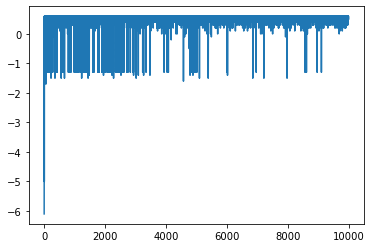

In [8]:
V,policy = SARSA()

In [9]:
# OK, so looking at this plot, we can see that a reward converges to the maximum quite fast
# This is because this is a very simple environment 
# in more complex environments, we'll see that this normally takes more time
# Notice that the reward fluctuates 
# because our policy sometimes makes us do random actions which reduce the reward

In [10]:
g.print_values(V)
g.print_policy(policy)

---------------------------
 0.60| 0.76| 1.00| 0.00|
---------------------------
 0.41| 0.00| 0.78| 0.00|
---------------------------
 0.26| 0.35| 0.56| 0.34|
------------------
 R | R | R |   |
------------------
 U |   | U |   |
------------------
 U | R | U | L |


In [11]:
# The policy makes perfect sense
# also seeks the shortest path since we used the negative grid
# In order to make sense of the values
# we can see that they generally decease the further away we get from the goal
# again, should we want to check how accurate this is
# we can compare it with the dynamic programming script
# which gives the exact answer

<h1>Math</h1>

In this section, we're going to look at an alternative temporal difference control algorithm called Q-Learning

---

<h3>Q-Learning</h3>

So why is this necessary?

Well, if we've ever read about reinforcement learning on our own, we may have noticed that learning is quite popular

On the other hand, SARSA is not

There are many variations of learning, such as Deep Q-learning

<img src='extras/57.4.PNG' width='500'></img>

Maybe someone out there has implemented Deep SARSA, but it's certainly not as recognizable

---

<h3>Epsilon-Greedy</h3>

So what's our motivation for improving SARSA

We'll recall early on where we discussed why Epsilon Greedy is not an optimal policy

It helps us with exploration, but it also means that some percentage of the time we're just going to choose a suboptimal action randomly

Q-Learning gives us one way of avoiding this

---

<h3>Q-Learning vs. SARSA</h3>

Essentially, Q-Learning is just one small change 

With SARSA, we'll recall that our target is 

$$\large \text{SARSA Target : } r + \gamma Q(s^\prime,a^\prime)$$

note : $Q(s^\prime,a^\prime)$ is the action we actually took

With Q-Learning our target is 

$$\large \text{Q-Learning Target : } r + \gamma \max_{a^\prime} Q(s^\prime,a^\prime)$$

note : $Q(s^\prime,a^\prime)$ is the optimal action

So what's the main difference?

The main difference is that instead of using the actual next action in the target, we use the action we would have taken if we had chosen the current optimal action

So in SARSA, when we're doing Epsilon greedy, sometimes we'll choose an action $a^\prime$ that's not optimal

This means that the target will correspond to that suboptimal action 

With Q-Learning we'll always use the maximum $Q$ meaning that we're learning the $Q$ function for the policy in which we always choose the best action

---

<h3>On-Policy vs Off-Policy</h3>

So a new concept arises when we discuss the difference between SARSA and Q-learning 

Specifically, we can describe an algorithm as being either on-policy or off-policy

SARSA is called an on-policy method because the $Q$ function we're learning is the $Q$ function for the policy that we're actually using

Once we complete training, this will be the policy that we consider to be the best policy for the agent

On the other hand, Q-Learning is an off-policy method

This is because our actions are dictated by an Epsilon really policy

However, the $Q$ function we are learning is for a purely greedy policy

The greedy policy is what we would get if we always chose the optimal action which corresponds to taking the max over $Q$ 

We can differentiate between the two kinds of policies as follows

The policy that we use to play the episode is called the <strong>behavior</strong> Policy

The behavior policy dictates how we act in the environment

It tells us which actions we should perform

On the other hand, the policy that we are learning is called the <strong>target</strong> policy

The target policy may not be the same as the one we are using to determine our actions during training

But when we update $Q$, the $Q$ we want to find corresponds to this target policy

Furthermore, the target policy is the policy we eventually want to end up with the one that represents an intelligent agents that knows how to maximize its rewards

In fact, if weour further your studies in reinforcement learning, we may learn about methods in which our behavior policy can be completely random, that is uniform random, and we can still end up with an optimal target policy

---

<h3>Q-Learning Pseudocode</h3>

So to end this ssection, let's look at the pseudocode for Q-Learning 

```
Initialise: Q(s,a) = random for all s in state space and a in action space

Loop until convergance:
    s = env.reset()
    while s not terminal:
        a = epsilon_greedy(Q(s,:))
        s',r = env.move(a)
        Q(s,a) = Q(s,a) + α(r + γ max_a' Q(s',a') - Q(s,a))
        s = s'
```

As before, we're going to initialise $Q$ randomly except for terminal states where it's equal to zero

Next, we enter a loop that plays for some number of episodes

Inside this loop, we reset our environment and obtain the initial state, which we call $s$

Next, we enter a loop that exits when the episode is complete

Inside this loop, we use an epsilon greedy policy to get our action, which we call $a$

So this follows our behavior policy

Next, we take the action $A$ in the environment, which gives us back the reward $r$ and the next state $s^\prime$

Next we use `(s,a,r,s')` to update $Q$ using the formula we saw earlier

Note one difference between this and SARSA where we no longer have to wait to get the next action $a^\prime$ before updating $Q$

Next, we assign $s^\prime$ to be the current state $s$ for the next iteration of the loop

OK, so that's it for Q-Learning

<h1>Math</h1>

In [1]:
# lets try implementing policy evaluation using RD learning
# of course since we will be resetting our env
# we need epsilon greedy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# first lets implement our Gridworld enviroment
# we will be using the same interface as described above

class GridWorld:
    def __init__(self,rows,cols,start_pos):
        self.rows = rows
        self.cols = cols
        self.pos = start_pos
        self.start_pos = start_pos
    
    def current_state(self):
        return self.pos
    
    def set_state(self,state):
        self.pos = state
        
    def set_actions_rewards(self,actions,rewards):
        self.actions = actions
        self.rewards = rewards
        
    def all_states(self,):
        return [(i,j) for i in range(self.rows) for j in range(self.cols)]
    
    def is_terminal(self,state):
        # we cant perform an action in a terminal state
        # so we expect not to find it in the keys
        return state not in self.actions.keys()
    
    def game_over(self):
        return self.is_terminal(self.pos)
    
    def next_state(self,s,a):
        # return next state should we take action a
        # but do not take that action
        i,j = s
        # if we are allowed to do this action in our current position
        if a in self.actions.get(s,[]): 
            if a == 'R':
                j += 1
            if a == 'L':
                j -= 1
            if a == 'U':
                i -= 1
            if a == 'D':
                i += 1
        return (i,j)
    
    def move(self,a):
        # return next state should we take action a
        # this time we actually make the move
        # and thus return reward
        i,j = self.pos
        # if we are allowed to do this action in our current position
        if a in self.actions.get(self.pos,[]): 
            if a == 'R':
                j += 1
            if a == 'L':
                j -= 1
            if a == 'U':
                i -= 1
            if a == 'D':
                i += 1
        self.pos = (i,j)
        # if no reward return 0
        return self.rewards.get(self.pos,0)
    
    # lets add methods to print values and actions
    def print_values(self,V):
        for i in range(self.rows):
            print('-'*9*self.rows)
            for j in range(self.cols):
                v = V[i,j]
                if v >= 0:
                    # if 0 or +ve, add space so it aligns well when we have -
                    print(" %.2f|" %v,end="")
                else:
                    print("%.2f|" %v,end="")
            print("")
    
    def print_policy(self,P):
        for i in range(self.rows):
            print('-'*6*self.rows)
            for j in range(self.cols):
                print(" %s |" %P.get((i,j),' '),end="")
            print("")
                
    def state_to_loc(self,state): # convert state tupe (0,1) to location 1
        return state[0]*self.rows + state[1]
    
    def reset(self):
        self.pos = self.start_pos

In [3]:
def standard_grid():
    g = GridWorld(3,4,(2,0))
    rewards = {(0,3):1,(1,3):-1}
    actions = {
        (0,0): ('D','R'),
        (0,1): ('L','R'),
        (0,2): ('L','D','R'),
        (1,0): ('U','D'),
        (1,2): ('U','D','R'),
        (2,0): ('U','R'),
        (2,1): ('L','R'),
        (2,2): ('L','R','U'),
        (2,3): ('L','U')
    }
    g.set_actions_rewards(actions,rewards)
    return g

In [4]:
def negative_grid(step_cost=-0.1):
    # in this game we want to try to minimize the number of moves
    # so we will penalize every move
    g = standard_grid()
    g.rewards.update({
        (0, 0): step_cost,
        (0, 1): step_cost,
        (0, 2): step_cost,
        (1, 0): step_cost,
        (1, 2): step_cost,
        (2, 0): step_cost,
        (2, 1): step_cost,
        (2, 2): step_cost,
        (2, 3): step_cost,
    })
    return g

In [5]:
g = negative_grid()

In [6]:
def epsilon_greedy(best_action,eps=0.1):
    if np.random.random() < eps:
        return np.random.choice(4)
    else:
        return best_action

In [9]:
def Q_Learning():
    deltas = []
    all_states = g.all_states()
    all_actions = ['L','U','D','R']
    
    Q = np.zeros((g.rows,g.cols,len(all_actions)))
    episodes = 10000
    alpha = 0.1
    gamma = 0.9
    
    rewards =  np.zeros(episodes)
    for episode in range(episodes):
        g.reset()
        s = g.current_state()
        while not g.game_over():
            a = epsilon_greedy(np.argmax(Q[s],-1))
            r = g.move(all_actions[a])
            rewards[episode] += r
            s_prime = g.current_state()
            Q[s[0],s[1],a] = Q[s[0],s[1],a] + alpha*(r+np.max(gamma*Q[s_prime[0],s_prime[1]],axis=-1)-Q[s[0],s[1],a])
            s = s_prime
    plt.plot(rewards)
    plt.show()
    
    policy = np.argmax(Q,axis=-1)
    policy = {s:all_actions[policy[s]] for s in all_states if not g.is_terminal(s)}
    V = np.max(Q,axis=-1)
    return V,policy

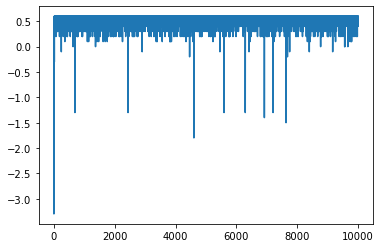

In [10]:
V,policy = Q_Learning()

In [11]:
g.print_values(V)
g.print_policy(policy)

---------------------------
 0.62| 0.80| 1.00| 0.00|
---------------------------
 0.46| 0.00| 0.80| 0.00|
---------------------------
 0.31| 0.46| 0.62| 0.14|
------------------
 R | R | R |   |
------------------
 U |   | U |   |
------------------
 U | R | U | L |


In [12]:
# same as before

<h1>Math</h1>

OK, so now that we've learned how to do both prediction and control using temporal difference learning, it's time to summarize this notebook

---

<h3>Temporal Difference Learning notebook Summary</h3>

This notebook was all about how to convert the Monte Carlo method into a one step update

To do this, we reacquainted ourselves with the Bellman equation

The definition of the value function has $G$ inside the expected value, 

$$\large V_\pi(s) = E \left[ G_t \vert S_t =s \right] \approx \frac{1}{N} \sum^N_{i=1}G_{i,s}$$

but the Bellman equation replaces $G$ with $r+ \gamma V(s^\prime)$

$$\large V_\pi(s) = E_\pi \left[ R_{t+1} + \gamma V_\pi(S_{t+1}) \vert S_t = s\right]$$

This makes it so that the value function depends on other values in the value function

And of course, this is easier to sample

In order to find $G$, we have to play an entire episode and sum up all the rewards

But finding $r + \gamma V(s^\prime)$ only requires a single step into the next state $s^\prime$

---

<h3>Bootstrapping</h3>

We can also make note of how temporal difference learning brings us back to the concept of bootstrapping

We first learned about bootstrapping in the context of dynamic programming, where we updated the value function using the existing value function

As we kept iterating, our estimate improved

The same thing happens with temporal difference learning

We can imagine that when we first start the so called target, $r + \gamma V(s^\prime)$, is not accurate because we don't actually know $V(s^\prime)$

However, as we keep iterating, all the values become more accurate and this target too becomes more accurate

---

<h3>On-Policy vs Off-Policy</h3>

We also learned about the important difference between on-policy and off-policy methods 

With on-policy methods like SARSA, our behavior policy and our target policy are the same

This means that if our behavior policy is suboptimal, as in Epsilon greedy, then our target policy is also suboptimal 

With off-policy methods like Q-learning this need not be the case

Q-Learning is one example of an off-policy method where a behavior policy does not need to match the target policy 

Because our target in the $Q$ update always uses the max, we're effectively asking to learn the value for the greedy action rather than the action we actually took